# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
#загрузка данных и библиотек которые потребуются в проектной работе
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 
#вывод таблицы, разделение строк.
df = pd.read_csv('/home/andrey/Datasets/real_estate_data.csv' , sep='\t' , decimal='.')

#ознакомимся с данными
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В большинстве столбцов данные числовые, но в df их тип данных 'object' (например в столбцах 'ponds_around3000', 'total_area') логично в дальнейшем их будет заменить на float или int. 
В ряде столбцов, (например ponds_around3000, ponds_nearest, ponds_nearest) достаточно большое количество пропущенных значений, необходимо более подробно расмотреть данные в этих столбцах, выявить зависимости, и решить проблему с пропусками.  

### Шаг 2. Предобработка данных

In [3]:
#заполним пропуски в стобце 'locality_name'
df['locality_name'] = df['locality_name'].fillna('Отсутствует')

#меняем данные в столбцах на числовые:
df['ponds_nearest'] = pd.to_numeric(df['ponds_nearest'] , errors='coerce')
df['days_exposition'] = pd.to_numeric(df['days_exposition'] , errors='coerce')
df['ponds_around3000'] = pd.to_numeric(df['ponds_around3000'] , errors='coerce')
df['parks_nearest'] = pd.to_numeric(df['parks_nearest'] , errors='coerce')
df['parks_around3000'] = pd.to_numeric(df['parks_around3000'] , errors='coerce')
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'] , errors='coerce')
df['airports_nearest'] = pd.to_numeric(df['airports_nearest'] , errors='coerce')
df['balcony'] = pd.to_numeric(df['balcony'] , errors='coerce')
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'] , errors='coerce')
df['living_area'] = pd.to_numeric(df['living_area'] , errors='coerce')
df['floors_total'] = pd.to_numeric(df['floors_total'] , errors='coerce')
df['ceiling_height'] = pd.to_numeric(df['ceiling_height'] , errors='coerce')
df['total_area'] = pd.to_numeric(df['total_area'] , errors='coerce').astype(float)
df['last_price'] = pd.to_numeric(df['last_price'] , errors='coerce').astype(float)

Очевидно, что данные в столбцах выше должны быть числовыми.

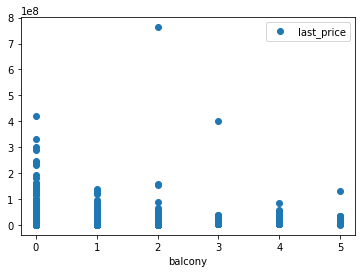

In [4]:
#пропуски в балконах подразумевают их отсутствие, заменим на 0
df['balcony'] = df['balcony'].fillna('0').astype(int)

#проверим, влияет ли количество балконов на стоимость недвижимости
df.plot(x='balcony', y='last_price', style='o')

Т.к сильного влияния нет заменим все квартиры с балконами на 1,квартиры без балконов на 0, и приведём к булеву типу данных

In [5]:
df.loc[df['balcony']>1,'balcony'] = df['balcony']==1
df['balcony'] = df['balcony'].astype(bool)

#пропущенные значения в апартаментах логично заменить на 0 т.к. скорее всего пропуск означает то, 
#что объект недвижимости не является апартаментом
df['is_apartment'] = df['is_apartment'].fillna('0').astype(bool)

#заполним пропущенные данные в 'floors_total' средними значениями в зависимости от этажа и населенного пункта.
df['floors_total'] = df.groupby(['floor','locality_name'])['floors_total'].transform(lambda x: x.fillna(x.mean()))
df['floors_total'] = df.groupby(['locality_name'])['floors_total'].transform(lambda x: x.fillna(x.mean())).astype(int)

Изучим подробнее высоту потолков

In [6]:
print(df['ceiling_height'].describe())

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Есть явные аномалии с минимальными и максимальными значениями, перед заполнением пропусков, заменим аномальные значения на медиану

In [7]:
df.loc[(df['ceiling_height'] <= 2.2) | (df['ceiling_height'] > 5.0), 'ceiling_height'] = df['ceiling_height'].median()
#заполним пропущенные знчения медианой исправленных данных
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Рассмотрим пропуски в 'kitchen_area'
Проверим совпадает ли пропуск в плоащади кухни с тем фактом, что объект недвижимости является студией или квартирой с свободной планировкой
В 'kitchen_area' 2278 пропущенных значений

In [8]:
df['kitchen_area'] = df['kitchen_area'].fillna(0).astype(int)
comparison_kitchen_studio = df[(df['kitchen_area']==0)&((df['is_apartment']==True)|(df['open_plan']==True))]
print('Количество пропущенных значений площади кухни в студиях или квартирах со свободной планировкой: ' ,comparison_kitchen_studio['kitchen_area'].count())

Количество пропущенных значений площади кухни в студиях или квартирах со свободной планировкой:  2110


При этом из 2278 пропущенных значений 2110 относится к студиям, из чего можно сделать вывод, что в большинстве случаев, пропуски относятся к квартирам-студиям.
Поэтому заполним пропущенные значения нулями

In [9]:
#проверим тоже самое в 'living_area'
#всего в 'living_area' 1903 пропущеных значения
df['living_area'] = df['living_area'].fillna(0)
comparison_total_studio = df[(df['living_area']==0)&(df['is_apartment']==True)]
print('количество пропущенных значений жилой площади в студиях: ' ,comparison_total_studio['living_area'].count())


количество пропущенных значений жилой площади в студиях:  1791


In [10]:
#Т.к. прослеживается та жа логика заменим нули на 80% total_area, сделая поправку на нежилую площадь.
df['living_area'] = df['living_area'].replace(0 , df['total_area']*0.8)
df['living_area'] = df['living_area'].astype(int)

Пропущенные значения в столбцах 'parks_around3000' и 'ponds_around3000', скорее всего появились из-за отсутсвия парков и водоёмов в радиусе 3км. Поэтому заменим пропуски на значение большее чем 3 км.

In [11]:
df['parks_around3000'] = df['parks_around3000'].fillna(3001).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(3001).astype(int)

#теперь можно проанализировать пропуски в 'parks_nearest' и 'ponds_nearest'
print(df.groupby('parks_around3000')['parks_nearest'].count())
print(df.groupby('ponds_around3000')['ponds_nearest'].count())


parks_around3000
0          4
1       5681
2       1747
3        647
3001       0
Name: parks_nearest, dtype: int64
ponds_around3000
0          0
1       5717
2       1892
3       1501
3001       0
Name: ponds_nearest, dtype: int64


Видно, что значения о расстоянии до парка/водоёма пропущены там, где парк/водоём отсутствует на расстоянии 3км. Т.к. парк/водоём отсутствуют в пешей доступности, то влияние на стоимость квартиры они не оказывают, поэтому данные лучше оставить без изменений.

In [12]:
#переведем в datetime столбец "first_day_exposition", отбросим время, т.к. оно не указано.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

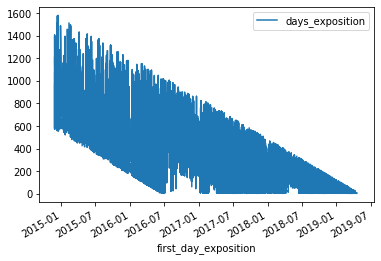

In [13]:
#обработаем пропуски в 'days_exposition'
df.plot(x='first_day_exposition', y='days_exposition')

Из графика видно что чем позже объявление было опубликовано, тем меньше дней соответственно оно размещено в продаже. Проверим когда были размещены объявления с пропущенными значениями в 'days_exposition'

In [14]:
nan_exposition = df.query('days_exposition=="nan"')

nan_exposition['days_exposition'] = nan_exposition['days_exposition'].fillna(1)
nan_exposition['year_exposition'] = pd.DatetimeIndex(nan_exposition['first_day_exposition']).year
print(nan_exposition.groupby('year_exposition')['days_exposition'].count())


year_exposition
2014      18
2015      70
2016      67
2017     271
2018     959
2019    1796
Name: days_exposition, dtype: int64


Из полученных данных видно, что большинство пропущенных значений в более свежих объявления, из чего можно сделать вывод, что данные обявления ещё не сняты с публикации, и значение days_exposition, по ним не рассчитано. Поэтому заменим пропуски на 0.

In [15]:
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)

Обработаем пропуски в 'airports_nearest' и 'cityCenters_nearest', заменим на медианные значения в тех населенных пунктах где указано хотя бы 1 расстояние.

In [16]:
df['airports_nearest'] = df.groupby(['locality_name'])['airports_nearest'].transform(lambda x: x.fillna(x.median()))
df['cityCenters_nearest'] = df.groupby(['locality_name'])['cityCenters_nearest'].transform(lambda x: x.fillna(x.median()))

#изучим остальные
air_local_pivot=df.fillna(-1).query('airports_nearest==-1').pivot_table(index='locality_name', values='airports_nearest', aggfunc='count')

print(air_local_pivot.describe())
air_local_pivot.head(10)

       airports_nearest
count        336.000000
mean          16.029762
std           49.044960
min            1.000000
25%            1.000000
50%            3.000000
75%            9.000000
max          522.000000


,airports_nearest
locality_name,
Бокситогорск,16
Волосово,36
Волхов,111
Всеволожск,398
Выборг,237
Высоцк,4
Гатчина,307
Ивангород,28
Каменногорск,13


Остались только те населенные пункты в которых неизвестно расстояние до аэропорта/центра ни у одного объекта недвижимости. Замена пропусков на какие то данные сильно исказит их. Поэтому лучше оставить пропуски.

### Шаг 3. Посчитайте и добавьте в таблицу

In [17]:
#добавим в таблицу цену 1 квадратного метра(разделим общую цену, на метраж)
df['sqm_price']= df['last_price']/df['total_area'].astype(int)

Стоимость квадратного метра, позволит сегментировать объявления.

In [18]:
#добавим столбцы с днём недели, месяцем и годом публикации

df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

Для дальнейшего анализа данных, будет полезным добавить отдельные столбцы с днём недели, месяцем и годом публикации.

In [19]:
#добавим этаж квартиры; варианты — первый, последний, другой;

def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
            return 'первый'
    if floor == floors_total:
            return 'последний'
    return 'другой'
    
df['floor_type'] = df.apply(floor_type, axis=1) 

С помощью функции добавлен столбец с классификацией этажей, что позволит узнать влияние этажа на стоимость квартиры.

In [20]:
#добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.
df['live/total']= df['living_area']/df['total_area'].astype(int)
df['kitchen/total']= df['kitchen_area']/df['total_area'].astype(int)


Отношение жилой площади и площади кухни к общей позволит более точно изучить сегментированные квартиры.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

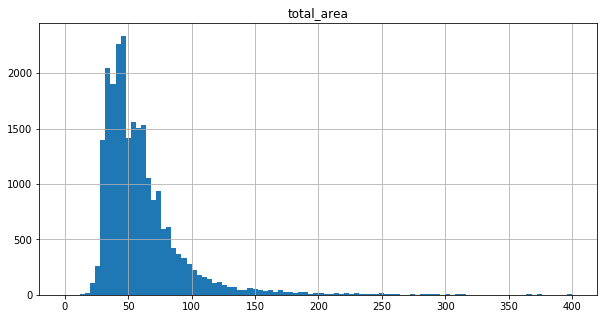

Из полученной гистограммы видно нормальное распределение плащадей квартир, так же можно заметить аномально большие значения


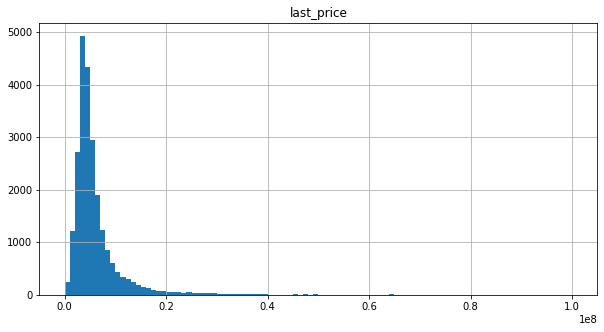

Квартиры, в основном, стоят до 10 миллионов. Однако встрачаются квартиры стоимостью до 100 миллионов, скорее всего они расположены в центра Санкт-Петербурга, стоит более подробно изучить дорогие квартиры


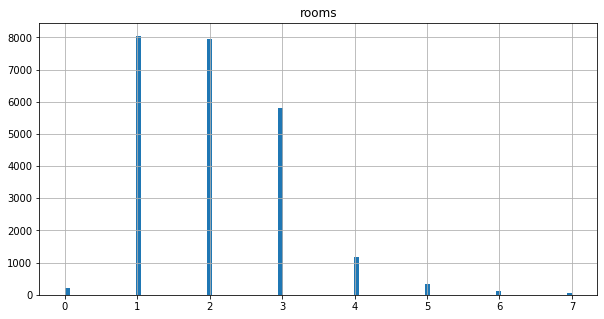

Однокомнатных и двухкомнатных квартир примерно одинаковое количество, несколько меньше трёхкомнатных. Квартиры с 4 и более комнатами встречаются крайне редко


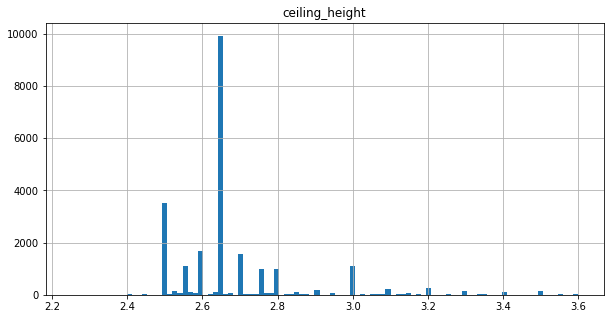

В основном, высота потолков начинается с 2.5 метров и ограничивается 3-мя метрами


In [21]:
#построим гистограммы.
df['total_area'].hist(bins=100, range=(0,400),figsize=(10,5)).set_title('total_area')
plt.show()
print('Из полученной гистограммы видно нормальное распределение плащадей квартир, так же можно заметить аномально большие значения')
df['last_price'].hist(bins=100,figsize=(10,5),range=(1,1.0e+08)).set_title('last_price')
plt.show()
print('Квартиры, в основном, стоят до 10 миллионов. Однако встрачаются квартиры стоимостью до 100 миллионов, скорее всего они расположены в центра Санкт-Петербурга, стоит более подробно изучить дорогие квартиры')
df['rooms'].hist(bins=100, range=(0,7),figsize=(10,5)).set_title('rooms')
plt.show()
print('Однокомнатных и двухкомнатных квартир примерно одинаковое количество, несколько меньше трёхкомнатных. Квартиры с 4 и более комнатами встречаются крайне редко')
df['ceiling_height'].hist(bins=100,range=(2.25,3.6),figsize=(10,5)).set_title('ceiling_height')
plt.show()
print('В основном, высота потолков начинается с 2.5 метров и ограничивается 3-мя метрами')

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9075ccbd0>]],
      dtype=object)

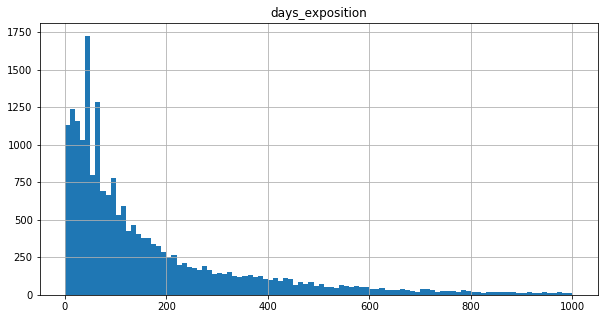

In [22]:
#сделам срез данных, что бы убрать нулевые значения.
good_df = df.query('days_exposition>0')
good_df.hist(column='days_exposition', bins=100, range=(0,1000), figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe906b70150>]],
      dtype=object)

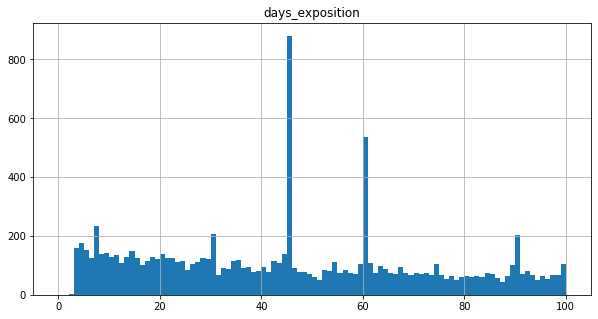

In [23]:
#большинство продаж приходится на первые 100 дней, рассмотрим их подробней:
good_df.hist(column='days_exposition', bins=100, range=(0,100), figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe90266c550>]],
      dtype=object)

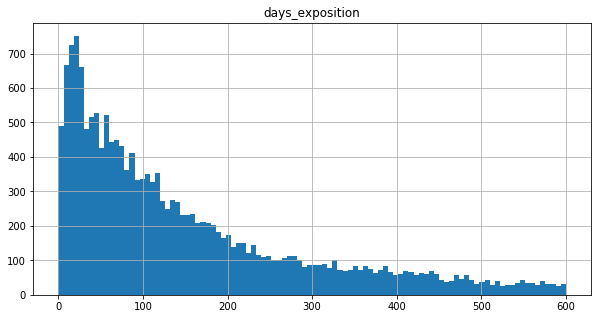

In [24]:
#очевидно, что значения на 7,30,45,60,90 днях аномально большие, удалим их из выборки, 
#как и объявления которые "прожили" больше 600 дней.
good_df = df.query('days_exposition>0 & days_exposition<600 & days_exposition not in(7,30,45,60,90)')
good_df.hist(column='days_exposition', bins=100, range=(0,600), figsize=(10,5))

In [25]:
#рассчитаем среднее и медиану
mean_exposition = good_df['days_exposition'].mean()
median_exposition = good_df['days_exposition'].median()
print('Среднее время продажи:',mean_exposition)
print()
print('Медианное время продажи:',median_exposition)
good_df['days_exposition'].describe()


Среднее время продажи: 150.0318223974032

Медианное время продажи: 103.0


count    17252.000000
mean       150.031822
std        140.702195
min          1.000000
25%         42.000000
50%        103.000000
75%        215.000000
max        599.000000
Name: days_exposition, dtype: float64

В среднем продажа квартиры занимает 4 месяца. Квартиры проданные за первые 1,5 месяца можно можно считать быстрыми сделками. Квартиры которые продали только после 600 дней можно считать необычно долгими.

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

count    17252.000000
mean        58.340271
std         33.696448
min         12.000000
25%         39.175000
50%         50.200000
75%         67.000000
max        900.000000
Name: total_area, dtype: float64

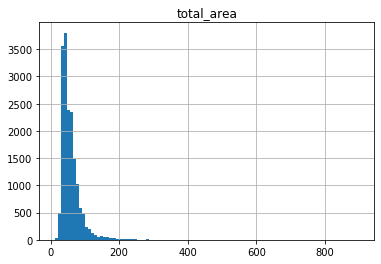

In [26]:
#изучим площади квартир
good_df.hist('total_area', bins=100)
good_df['total_area'].describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe901f68290>]],
      dtype=object)

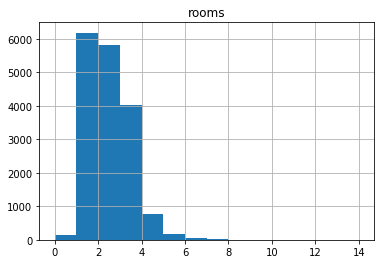

In [27]:
#уберём квартиры с площадью более 300 метров.
good_df = good_df.query('total_area<300')

#изучим количество комнат
good_df.hist('rooms', bins=14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe902084e10>]],
      dtype=object)

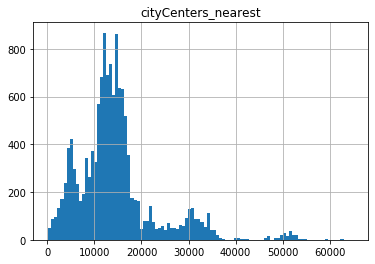

In [28]:
#уберём аномальные квартиры с 8 и более комнатами.
good_df = good_df.query('rooms<8')

#ознакомимся с гистограммой удаленности от центра.
good_df.hist('cityCenters_nearest', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9026f4450>]],
      dtype=object)

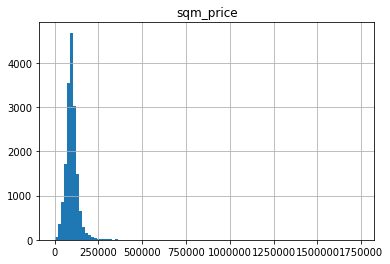

In [29]:
#построим гистограмму стоимости квадратного метра
good_df.hist('sqm_price', bins=100)

In [30]:
#уберем аномально большие и редкие значения со стоимостью более 300 тысяч за метр.
good_df = good_df.query('sqm_price<300000')


Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.800578  0.503498            -0.323091
total_area             0.800578    1.000000  0.783738            -0.222707
rooms                  0.503498    0.783738  1.000000            -0.165918
cityCenters_nearest   -0.323091   -0.222707 -0.165918             1.000000


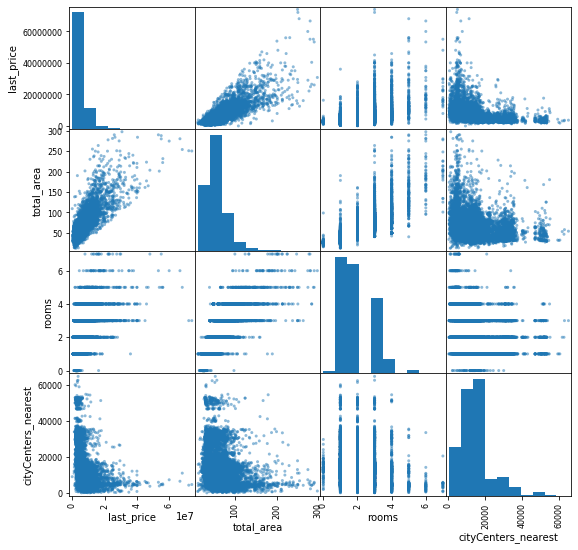

In [31]:
#изучим зависимость от квадратного метра, числа комнат, удалённости от центра
corr_sqm_rooms_center=good_df[['last_price','total_area','rooms','cityCenters_nearest']]
pd.plotting.scatter_matrix(corr_sqm_rooms_center, figsize=(9, 9))
print(corr_sqm_rooms_center.corr())

Самая большая корреляция у цены наблюдается с площадью квартиры 0.67. Так же чем ближе квартиры находятся к центру города, тем больше они стоят. 
Коэффициент корреляции стоимости и количества комнат 0.39, сильной зависимости выявлено не было. Пик стоимости квартиры набирают на 4 комнатах, далее количество комнат не влияет на цену недвижимости.

In [32]:
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
floor_pivot = good_df.pivot_table(index='floor_type', values='last_price')
good_df.groupby('floor_type')['last_price'].median()

floor_type
другой       4650000.0
первый       3800000.0
последний    4236500.0
Name: last_price, dtype: float64

Как видно из полученных данных, стоимость квартир на первом и последнем этажах ниже, чем в квартирах на всех других этажах.

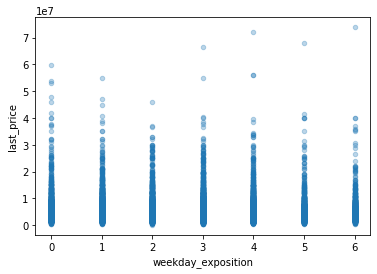

In [33]:
#изучим зависимость от даты размещения: дня недели, месяца и года.
date_price = good_df[['last_price','weekday_exposition','month_exposition','year_exposition']]
date_price.plot(x='weekday_exposition', y='last_price', kind='scatter', alpha=0.3)

С понедельника по пятницу оставляют примерно одинаковое количество объявлений. В субботу и воскресенье их заметно меньше. 
Самыми 


month_exposition
1     1028
2     1882
3     1600
4     1300
5      958
6     1391
7     1295
8     1382
9     1587
10    1701
11    1867
12    1117
Name: last_price, dtype: int64


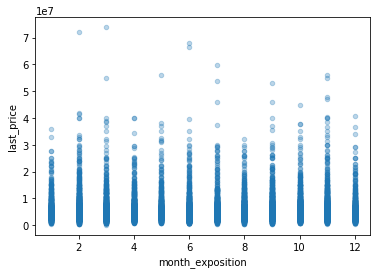

In [34]:
date_price.plot(x='month_exposition', y='last_price', kind='scatter', alpha=0.3)
print(date_price.groupby('month_exposition')['last_price'].count())

Меньше всего объявлений о продаже квартир оставляют в Декабре, Январе и Мае, скорее всего это связано с новогодними и майскими праздниками. При этом, на февраль, сразу после праздников, приходится максимально большое количество объявлений о продаже, что связано с окончанием праздников. Так же практически столько же объявлений о продаже выкладывают в ноябре месяце, прямо перед новогодними праздниками.

year_exposition
2014      28
2015     580
2016    2111
2017    7005
2018    6462
2019     922
Name: last_price, dtype: int64


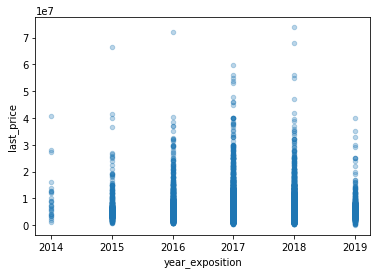

In [35]:
print(date_price.groupby('year_exposition')['last_price'].count())
date_price.plot(x='year_exposition', y='last_price', kind='scatter', alpha=0.3)


С момента получения данных, количество объявлений о продаже квартир ежегодно росло вплоть до 2017 года. В 2018 году было опубликовано несколько менешее количество объявлений, что может быть вызвано рядом факторов. Данные за 2019 год можно не учитывать, т.к. они собраны за несколько месяцев.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [36]:
#сгруппируем данные и выделим топ 10 пунктов

top10_locals = good_df.groupby('locality_name')['last_price'].count().sort_values('index',ascending=False).head(10)

#создадим новый столбец где оставим эти 10 пунктов а все остальные назовем другие
good_df['grouped_locality'] = (
    good_df['locality_name']
    .where(good_df['locality_name'].isin(top10_locals.index), 'Другие')
)

#рассчитываем среднюю стоимость квадратного метра.
locality_top = (
    good_df.query('grouped_locality != "Другие"')
    .pivot_table(index='grouped_locality', values='sqm_price', aggfunc='mean')
    .sort_values('sqm_price', ascending=False)
)
locality_top

,sqm_price
grouped_locality,
Санкт-Петербург,109089.924627
Пушкин,103057.916989
деревня Кудрово,92996.907339
посёлок Парголово,90031.002263
посёлок Мурино,86453.645271
посёлок Шушары,78541.568606
Колпино,75190.233075
Гатчина,67784.907091
Всеволожск,66991.876158


Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, самое дешевое жильё продаётся в Выборге.

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

                      last_price      sqm_price
centers_nearest_km                             
0                   1.198219e+07  134365.935292
1                   1.168952e+07  132116.578851
2                   9.970854e+06  121797.045202
3                   9.463207e+06  115068.918058
4                   1.161135e+07  132096.721649
5                   1.073473e+07  131988.225572
6                   9.682227e+06  130449.125839
7                   9.065632e+06  129632.744571
8                   7.699332e+06  116690.073376
9                   6.012274e+06  108467.249156
10                  6.007912e+06  108644.986850
11                  5.657069e+06  105009.115854
12                  5.845029e+06  108258.205593
13                  5.779575e+06  105745.868853
14                  5.418973e+06  103374.717748
15                  5.259921e+06  100330.630649
16                  5.315484e+06   99649.743963
17                  4.749403e+06   94121.455785
18                  5.149393e+06   94815

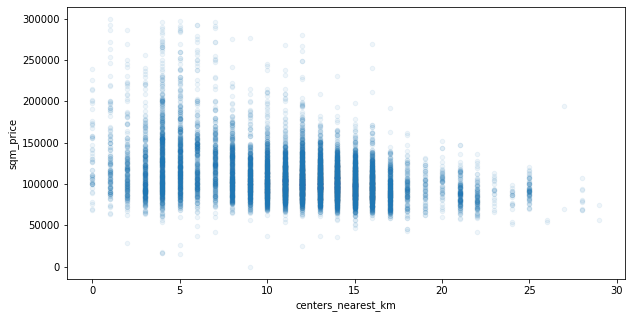

In [37]:
#создаём столбец с расстоянием до центра Питера в километрах:
good_df_stpetersburg = good_df.query('locality_name=="Санкт-Петербург"')
good_df_stpetersburg['centers_nearest_km'] = (good_df_stpetersburg['cityCenters_nearest']/1000).astype(int)
print(good_df_stpetersburg.pivot_table(index='centers_nearest_km',values=['last_price','sqm_price'],aggfunc=('mean')))
good_df_stpetersburg.sort_values('centers_nearest_km').plot(x='centers_nearest_km',y='sqm_price',figsize=(10,5), kind='scatter',alpha=0.07)


На расстоянии от 0 до 3 километров от центра города, стоимость квадратного метра, в среднм ниже, чем на расстоянии 4-8 километров. Это обусловлено старым жилым фондом, небольшим количеством объявлений(т.к. в центре города больше коммунальных квартир или квартир которые сдаются в аренду)
Кстати, максимальное количество квартир в продаже приходится на 11-15 километры от центра.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

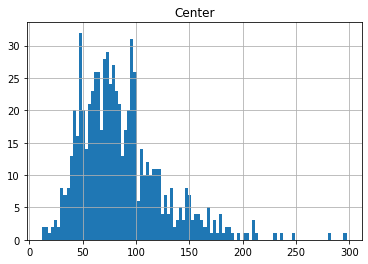

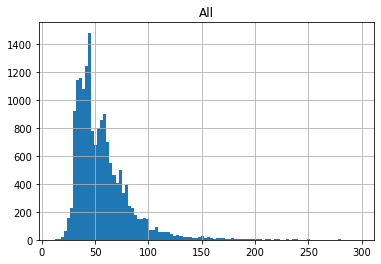

In [38]:
#сделаем датафрейм только с квартирами в центра Санкт-Петербурга.
center_stpetersburg = good_df_stpetersburg.query('centers_nearest_km <= 3')
#Сравним площади квартир в цетре и площади по городу.
center_stpetersburg['total_area'].hist(bins=100).set_title('Center')
plt.show()
good_df['total_area'].hist(bins=100).set_title('All')
plt.show()


Сравнивая две гистограммы видно, что средняя площадь квартиры в центре выше, чем в среднем по городу. 

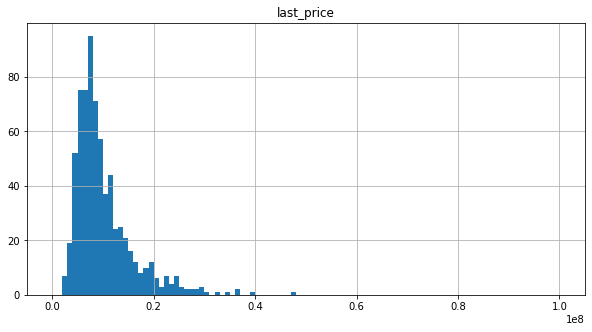

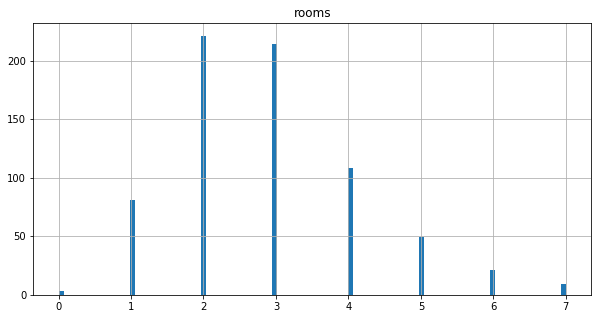

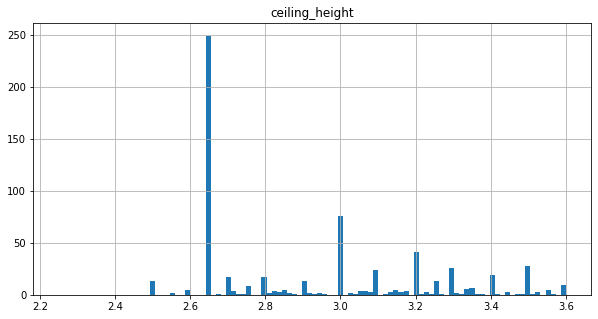

10210903.270538244

In [39]:
#изучим цену, количество комнат и высоту потолков.
center_stpetersburg['last_price'].hist(bins=100,figsize=(10,5),range=(1,1.0e+08)).set_title('last_price')
plt.show()

center_stpetersburg['rooms'].hist(bins=100, range=(0,7),figsize=(10,5)).set_title('rooms')
plt.show()

center_stpetersburg['ceiling_height'].hist(bins=100,range=(2.25,3.6),figsize=(10,5)).set_title('ceiling_height')
plt.show()
center_stpetersburg['last_price'].mean()

На гистограмме цены видно увеличение средней стоимости квартир это обусловлено большей площадью.
Количество однокомнатных квартир уменьшилось, но увеличилось количество квартир с количеством комнат 3 и более.
Средняя высота потолков так же увеличелась, потолки высотой 3 метра встречаются гораздо чаще.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe90015ba90>,
      dtype=object)

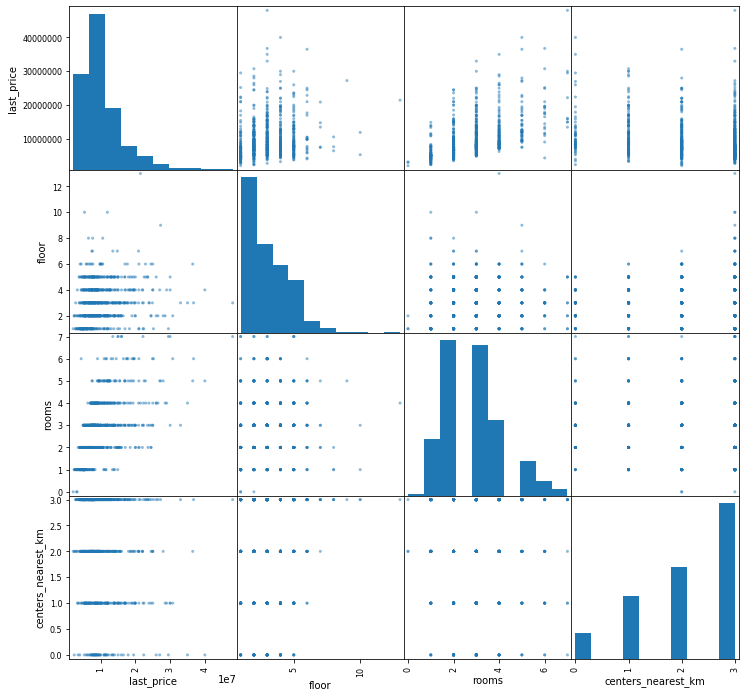

In [40]:
#Проверим отношение цены квартиры в центре к количеству этажей, комнат и удаленности от центра
corr_center=center_stpetersburg[['last_price','floor','rooms','centers_nearest_km']]
pd.plotting.scatter_matrix(corr_center, figsize=(12, 12))

В центре, самые дорогие квартиры расположены на 3-7 этажах, что скорее всего обусловлено общей невысокой застройкой центра города. Зависимость цены от количества комнат примерно одинаковая во всём городе. 
Меньше всего квартир предложено на расстоянии до 1000 метров от цетра. Что обусловлено большим количеством нежилых объектов недвижимости в этом районе. от 1 до 3 километров стоимость и количество примерно одинаковые.


### Шаг 5. Общий вывод

Сильнее всего, в общем по городу на стоимость квартир влияет их площадь и близость к центру города. 
Квартиры на первых и последних этажах стоят меньше чем квартиры расположенные на всех остальных этажах. В центральной части города ситуация несколько отличается из-за более низкой застройки, большинство объявлений представлено 2-6 этажами.
Площадь квартир в центре значительно отличается от средней по городу. Так же квартиры в центре, как правило, имеют более высокие потолки и большее количество комнат.
При этом самые дорогие квартиры в городе, расположились на расстоянии 4-7 километров от центра.
Если более подробно анализировать параметр удалённости от центра города, то большинство квартир расположено на 10-15 километрах от центра, из чего можно предположить, что там расположены самые густонаселенные районы Санкт-Петербурга и области. 
После пика объявлений на 10-15 километрах их количество постепенно уменьшается, переодически повышаясь на более дальних отметках, например на 50 километрах от центра, что говорит о населенных пунктах которые расположены за городом.